#Assignment 4.- Linear Regression

Guillermo Sebastian Farias Dominguez (2001725)                                   
Ismael Gutierrez Puente (1995316)                                                
Jocelyn Benitez Ramirez (2109461)

Class Day: Thursday                                                              
Hour: N4-N6

# Part 1: Load Libraries

In [1]:
# Load Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import pandas as pd

# Part 2: Load Data


In [2]:
# Load Data
np.random.seed(0)
study_hours = np.random.rand(500, 1) * 10
grades = study_hours + np.random.randn(500, 1)

#Part 3: Data Preprocessing

In [3]:
# Data Preprocessing
X_train, X_test, y_train, y_test = train_test_split(study_hours, grades, test_size=0.2, random_state=42)

#Eliminate data that is impossible to provide (Negative grades or grades above 10)
y_train = np.clip(y_train, 0, 10)
y_test = np.clip(y_test, 0, 10)

# Flatten the arrays to make them 1-dimensional (This is to create a DataFrame)
X_train_flat = X_train.flatten()
X_test_flat = X_test.flatten()
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

# Create a DataFrame to display the data
data_df = pd.DataFrame({'Study Hours': np.concatenate((X_train_flat, X_test_flat)),
                        'Grades': np.concatenate((y_train_flat, y_test_flat))})

# Display the data in a table
print("Data for Linear Regression: \n")
print(data_df)

# Calculate the Pearson linear classification coefficient
r, _ = pearsonr(study_hours.flatten(), grades.flatten())
print("\nPearson Correlation Coefficient (r):", r)

Data for Linear Regression: 

     Study Hours    Grades
0       4.880563  5.283827
1       6.658591  6.681551
2       8.700121  9.055603
3       0.553743  1.818821
4       0.568481  1.590271
..           ...       ...
495     3.068101  2.016221
496     5.232481  4.956810
497     0.391878  0.000000
498     7.065747  6.398027
499     0.871293  0.000000

[500 rows x 2 columns]

Pearson Correlation Coefficient (r): 0.9477131441818437


#Part 5: Model Selection and Training

In [4]:
# Model Selection and Training
model = LinearRegression()
model.fit(X_train, y_train)

# Plotting the linear regression line equation
print("Linear Regression Equation: y = {:.2f}x + {:.2f}".format(model.coef_[0][0], model.intercept_[0]))

Linear Regression Equation: y = 0.98x + 0.01


#Part 6: Model Testing

In [5]:
# Model Testing
predictions = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.7963155868316923


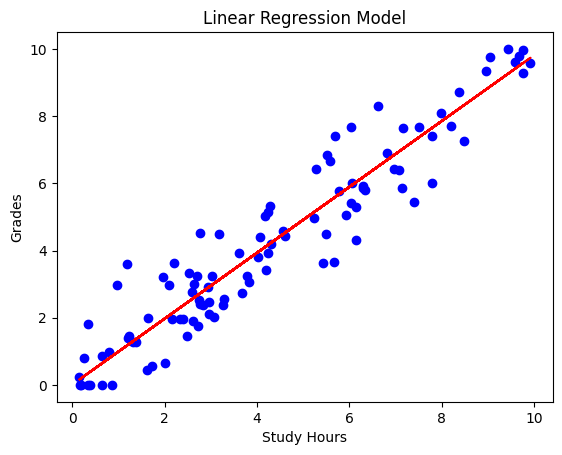

In [6]:
# Mostrar el modelo de regresión lineal
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, predictions, color='red')
plt.xlabel('Study Hours')
plt.ylabel('Grades')
plt.title('Linear Regression Model')
plt.show()